In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1496,ham,I'm always on yahoo messenger now. Just send t...,NaN,NaN,NaN
1768,ham,How. Its a little difficult but its a simple w...,NaN,NaN,NaN
2073,spam,FreeMsg: Claim ur 250 SMS messages-Text OK to ...,NaN,NaN,NaN
2079,ham,I can take you at like noon,NaN,NaN,NaN
262,ham,MY NO. IN LUTON 0125698789 RING ME IF UR AROUN...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
## DATA CLEANING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
4570,ham,\CHA QUITEAMUZING THATåÕSCOOL BABE
813,ham,I borrow ur bag ok.
2976,ham,"Ok omw now, you at castor?"
4741,ham,Ya very nice. . .be ready on thursday
3431,spam,Camera - You are awarded a SiPix Digital Camer...


In [9]:
##CHANGE COLUMN HEADER NAME

df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [10]:
df.sample(5)

,Target,Text
1254,ham,What your plan for pongal?
2112,spam,You are a winner you have been specially selec...
586,ham,"I dun thk i'll quit yet... Hmmm, can go jazz ?..."
4020,ham,We have to pick rayan macleran there.
967,ham,What do u want when i come back?.a beautiful n...


In [11]:
df.iloc[0:10]

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [12]:
df['Target'].value_counts()

ham     4825
spam     747
Name: Target, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [14]:
df.sample(5)

,Target,Text
1256,ham,"Not yet chikku..going to room nw, i'm in bus.."
1135,ham,K do I need a login or anything
1837,ham,And how's your husband.
3348,ham,Oh is it! Which brand?
5426,ham,Oh yeah! And my diet just flew out the window


In [15]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
##from sklearn.preprocessing import LabelEncoder
##encoder = LabelEncoder()

In [17]:
##df['Target'] = encoder.fit_transform(df['Target'])

In [18]:
##df.head()

In [19]:
# missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [20]:
# check for duplicate values
df.duplicated().sum()

403

In [21]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [22]:
df.duplicated().sum()

0

In [23]:
df.shape

(5169, 2)

In [24]:
df.tail()

,Target,Text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [25]:
##EDA

In [26]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df['Target'].value_counts()

ham     4516
spam     653
Name: Target, dtype: int64

In [28]:
#Data Imbalanced too many differences between them

In [29]:
import nltk

In [30]:
!pip install nltk

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
df['num_char'] = df['Text'].apply(len)

In [33]:
df.head()

,Target,Text,num_char
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
# num of words
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [35]:
df.head()

,Target,Text,num_char,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,23
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [36]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [37]:
df.head()

,Target,Text,num_char,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,23,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [38]:
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286903,1.961308
std,58.236293,13.227173,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [39]:
df['Ham?Spam'] = df['Target']

In [40]:
df.head()

,Target,Text,num_char,num_words,num_sentences,Ham?Spam
0,ham,"Go until jurong point, crazy.. Available only ...",111,23,2,ham
1,ham,Ok lar... Joking wif u oni...,29,8,2,ham
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,spam
3,ham,U dun say so early hor... U c already then say...,49,13,1,ham
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,ham


In [41]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [42]:
df['Target'] = encoder.fit_transform(df['Target'])

In [43]:
df.head()

,Target,Text,num_char,num_words,num_sentences,Ham?Spam
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,ham
1,0,Ok lar... Joking wif u oni...,29,8,2,ham
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,spam
3,0,U dun say so early hor... U c already then say...,49,13,1,ham
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,ham


In [44]:
#ham = df[df['Target']==0]
#spam = df[df['Target']==1]
#spam['num_words'].plot(bins=60, kind='hist') 
#ham['num_words'].plot(bins=20, kind='hist') 
#print( 'Spam percentage =', (len(spam) / len(df) )*100,"%")
#print( 'Ham percentage =', (len(ham) / len(df) )*100,"%")


Spam percentage = 12.633004449603405 %
Ham percentage = 87.3669955503966 %


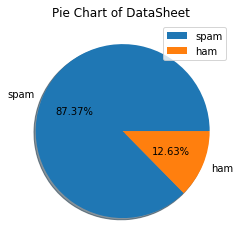

In [45]:
import matplotlib.pyplot as plt
ham = df[df['Target']==0]
spam = df[df['Target']==1]
tasks = ['spam','ham']
plt.pie(df['Target'].value_counts(), labels=tasks,autopct="%0.2f%%",shadow='True')
plt.title('Pie Chart of DataSheet ')
print( 'Spam percentage =', (len(spam) / len(df) )*100,"%")
print( 'Ham percentage =', (len(ham) / len(df) )*100,"%")

plt.legend()
plt.show()

In [46]:
# ham
df[df['Target'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.958370,1.815545
std,56.358207,13.395014,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [47]:
#spam
df[df['Target'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [48]:
df.head()

,Target,Text,num_char,num_words,num_sentences,Ham?Spam
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,ham
1,0,Ok lar... Joking wif u oni...,29,8,2,ham
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,spam
3,0,U dun say so early hor... U c already then say...,49,13,1,ham
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,ham


In [49]:
!pip install seaborn

In [50]:
import seaborn as sns

In [51]:
import matplotlib.pyplot as plt

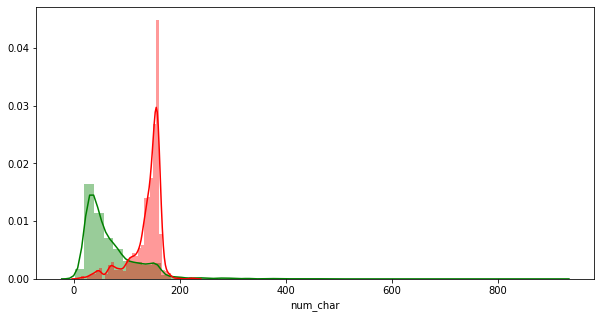

In [52]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['Target'] == 0]['num_char'],color="green")
sns.distplot(df[df['Target'] == 1]['num_char'],color='red')

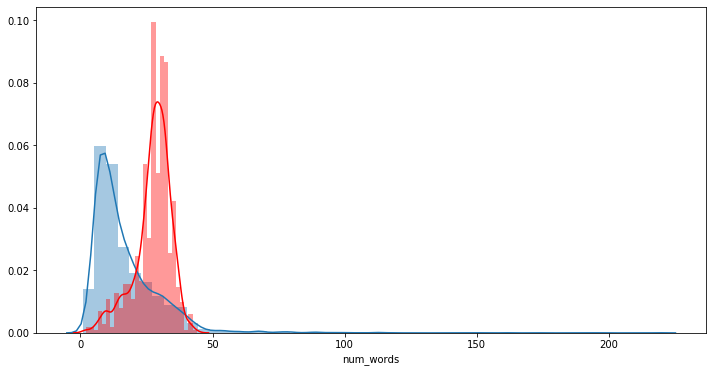

In [53]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['Target'] == 0]['num_words'])
sns.distplot(df[df['Target'] == 1]['num_words'],color='red')

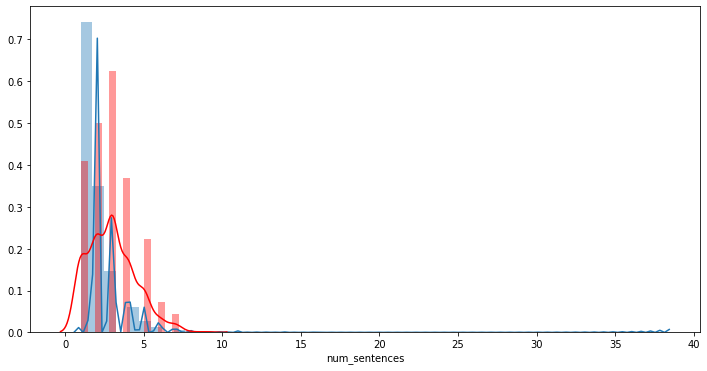

In [54]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['Target'] == 0]['num_sentences'])
sns.distplot(df[df['Target'] == 1]['num_sentences'],color='red')

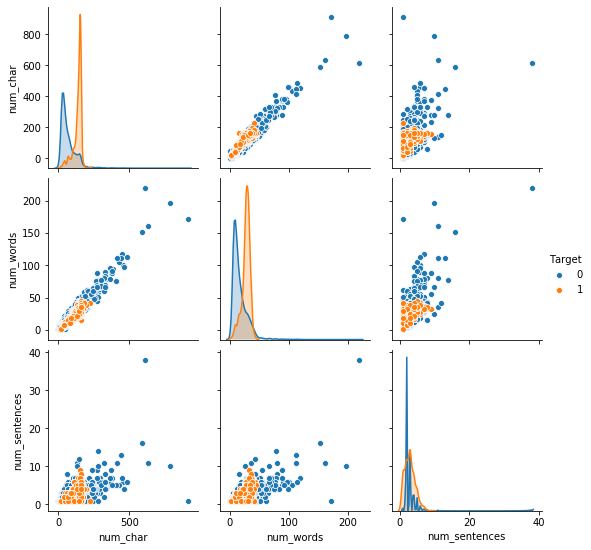

In [55]:
sns.pairplot(df,hue='Target')

In [56]:
df.corr()

,Target,num_char,num_words,num_sentences
Target,1.000000,0.384717,0.264160,0.267602
num_char,0.384717,1.000000,0.965309,0.626118
num_words,0.264160,0.965309,1.000000,0.683584
num_sentences,0.267602,0.626118,0.683584,1.000000


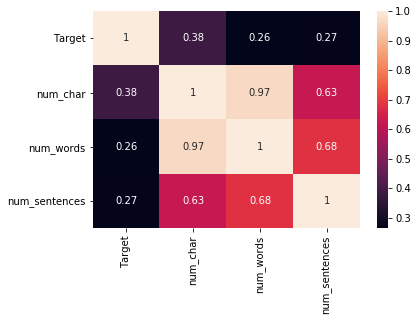

In [57]:
sns.heatmap(df.corr(),annot=True)

In [58]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [59]:
!pip install nltk

In [60]:
def transform_text(text):
    text = text.lower()
    return text

In [61]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

"i'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? i've cried enough today."

In [62]:
df.head()

,Target,Text,num_char,num_words,num_sentences,Ham?Spam
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,ham
1,0,Ok lar... Joking wif u oni...,29,8,2,ham
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,spam
3,0,U dun say so early hor... U c already then say...,49,13,1,ham
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,ham


In [63]:

def transform_text(Text):
    Text = Text.lower()
    Text = nltk.word_tokenize(Text)
    return Text

In [64]:
##lower word for LOWER_CASE
##tokenize for TOKENIZATION using NLTK library

transform_text("I am a final Year student of B.Tech In CSE")

['i', 'am', 'a', 'final', 'year', 'student', 'of', 'b.tech', 'in', 'cse']

In [65]:
def transform_text(Text):
    Text = Text.lower()
    Text = nltk.word_tokenize(Text)
    
    y = []
    for i in Text:
        if i.isalnum():
            y.append(i)
    return y

In [66]:
transform_text("@@ I am a final Year student of ## BTech B.Tech In !?CSE?")

['i', 'am', 'a', 'final', 'year', 'student', 'of', 'btech', 'in', 'cse']

In [67]:
  def transform_text(Text):
    y = []
    for i in Text:
        if i.isalnum():
            y.append(i)
    return y

In [68]:
transform_text("@@ I am a stu!?CSE?")

['I', 'a', 'm', 'a', 's', 't', 'u', 'C', 'S', 'E']

In [69]:
import nltk

In [70]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
## stopwords list in english language

from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [72]:
from nltk import word_tokenize

Ham Mean: 0.271
Spam Mean: 0.206


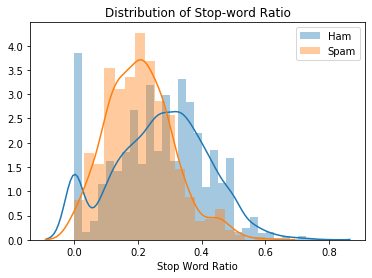

In [73]:
#Checking ratio of stop words
#Both spam and ham email contain stopwords
#All Spam emails contain stop words with a mean of 0.281
#All Ham emails contain stop words with a mean of 0.278
#But we can see from the graph, spam email contain high stop words ratio as compared to ham emails.
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
    
    
def stop_words_ratio(x):
    num_total_words = 0
    num_stop_words = 0
    for word in word_tokenize(x):
        if word in stop_words:
            num_stop_words += 1
        num_total_words += 1 
    return num_stop_words/num_total_words


ham_stopwords = df[df['Target']==0].Text.apply(stop_words_ratio)
spam_stopwords = df[df['Target']==1].Text.apply(stop_words_ratio)


sns.distplot(ham_stopwords, norm_hist = True, label = 'Ham')
sns.distplot(spam_stopwords,  label = 'Spam')

print('Ham Mean: {:.3f}'.format(ham_stopwords.values.mean()))
print('Spam Mean: {:.3f}'.format(spam_stopwords.values.mean()))
plt.title('Distribution of Stop-word Ratio')
plt.xlabel('Stop Word Ratio')
plt.legend()


In [74]:
## Punctuation lists 

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [75]:
def transform_text(Text):
    Text = Text.lower()
    Text = nltk.word_tokenize(Text)
    
    y = []
    for i in Text:
        if i.isalnum():
            y.append(i)
   
    Text = y[:]
    y.clear()
    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    return y


In [76]:
transform_text("@@ I am a final Year student of ## BTech B.Tech In !?CSE at Aliah University")

['final', 'year', 'student', 'btech', 'cse', 'aliah', 'university']

In [77]:
## Stemming

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('students')

'student'

In [78]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [79]:
transform_text("@@ I am a final Year student of ## BTech B.Tech In !?CSE at Aliah University")

'final year student btech cse aliah univers'

In [80]:
df['Text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [81]:
df['Final_Text'] = df['Text'].apply(transform_text)

In [82]:
df.head()

,Target,Text,num_char,num_words,num_sentences,Ham?Spam,Final_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,ham,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ham,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,ham,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,ham,nah think goe usf live around though


In [83]:
## WORD CLOUD

In [84]:
from wordcloud import WordCloud
wc = WordCloud(width=1200,height=500,min_font_size=10,background_color='black')

In [85]:
## SPAM messeges WORDCLOUD

spam_wc = wc.generate(df[df['Target'] == 1]['Final_Text'].str.cat(sep=" "))

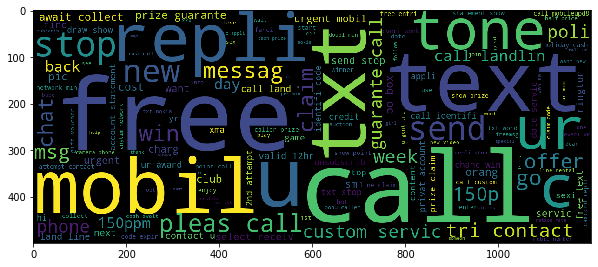

In [86]:
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

In [87]:
## HPAM messeges WORDCLOUD

ham_wc = wc.generate(df[df['Target'] == 0]['Final_Text'].str.cat(sep=" "))

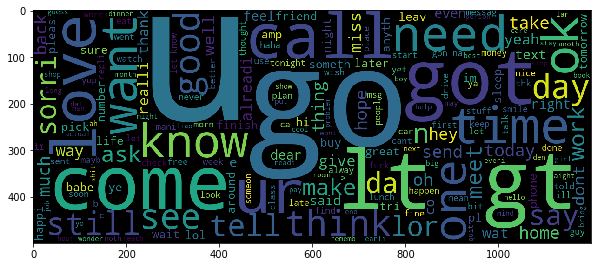

In [88]:
plt.figure(figsize=(10,6))
plt.imshow(ham_wc)

In [89]:
df[df['Target'] == 1]

,Target,Text,num_char,num_words,num_sentences,Ham?Spam,Final_Text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,spam,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,spam,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,spam,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,spam,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,spam,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,spam,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,spam,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,spam,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,spam,remind o2 get pound free call credit detail gr...


In [90]:
## FOR SPAM MESSAGES TOP 30 WORDS

spam_corpus = []
for msg in df[df['Target'] == 1]['Final_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [91]:
len(spam_corpus)

9883

In [92]:
from collections import Counter

In [93]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 189),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('prize', 82),
 ('4', 76),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 50),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [94]:
pd.DataFrame(Counter(spam_corpus).most_common(10))

,0,1
0,call,320
1,free,189
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


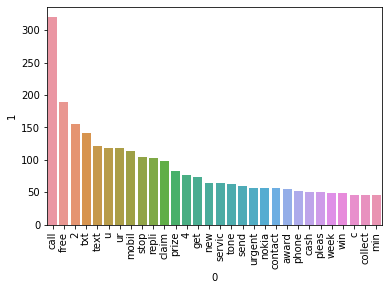

In [95]:

sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [96]:
## FOR HAM MESSAGES TOP 30 WORDS

ham_corpus = []
for msg in df[df['Target'] == 0]['Final_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [97]:
len(ham_corpus)

34773

In [98]:
#Counter(ham_corpus)

In [99]:
pd.DataFrame(Counter(ham_corpus).most_common(10))

,0,1
0,u,871
1,go,401
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,272
7,got,236
8,like,234
9,know,234


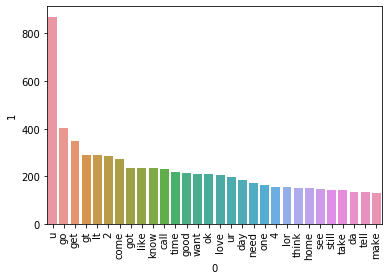

In [100]:

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [101]:
df.head()

,Target,Text,num_char,num_words,num_sentences,Ham?Spam,Final_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,ham,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ham,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,ham,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,ham,nah think goe usf live around though


In [102]:
## MODEL BUILDING

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [104]:
X = cv.fit_transform(df['Final_Text']).toarray()

In [105]:
 X.shape

(5169, 6629)

In [106]:
y = df['Target'].values

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [109]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [110]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [111]:
len(X_train)

4135

In [112]:
len(X_test)

1034

In [113]:
len(y_train)

4135

In [114]:
len(y_test)

1034

In [115]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [116]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [117]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,y_pred1))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred1))
print("Precision: ", precision_score(y_test,y_pred1))

Accuracy:  0.874274661508704
Confusion Matrix:  [[786 110]
 [ 20 118]]
Precision:  0.5175438596491229


In [118]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,y_pred2))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred2))
print("Precision: ", precision_score(y_test,y_pred2))

Accuracy:  0.965183752417795
Confusion Matrix:  [[872  24]
 [ 12 126]]
Precision:  0.84


In [119]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred3))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred3))
print("Precision: ",precision_score(y_test,y_pred3))

Accuracy:  0.9709864603481625
Confusion Matrix:  [[893   3]
 [ 27 111]]
Precision:  0.9736842105263158


In [120]:
## lets check another import with countVectorizer for better performance

In [121]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [122]:
X = tfidf.fit_transform(df['Final_Text']).toarray()

In [123]:
X.shape

(5169, 3000)

In [124]:
y = df['Target'].values

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [127]:
print(X.shape)

(5169, 3000)


In [128]:
print(y.shape)

(5169,)


In [129]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [130]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [131]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred1))
print("Accuracy: ", accuracy_score(y_test,y_pred1))

print("Precision: ", precision_score(y_test,y_pred1))
print("Recall: ", recall_score(y_test,y_pred1))
print("F1: ", f1_score(y_test,y_pred1))

Confusion Matrix: 
 [[785 111]
 [ 26 112]]
Accuracy:  0.867504835589942
Precision:  0.5022421524663677
Recall:  0.8115942028985508
F1:  0.6204986149584487


In [132]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred2))
print("Accuracy: ", accuracy_score(y_test,y_pred2))

print("Precision: ", precision_score(y_test,y_pred2))
print("Recall: ", recall_score(y_test,y_pred2))
print("F1: ", f1_score(y_test,y_pred2))

Confusion Matrix: 
 [[896   0]
 [ 28 110]]
Accuracy:  0.9729206963249516
Precision:  1.0
Recall:  0.7971014492753623
F1:  0.8870967741935484


In [133]:
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred3))
print("Accuracy: ", accuracy_score(y_test,y_pred3))

print("Precision: ", precision_score(y_test,y_pred3))
print("Recall: ", recall_score(y_test,y_pred3))
print("F1: ", f1_score(y_test,y_pred2))

Confusion Matrix: 
 [[893   3]
 [ 27 111]]
Accuracy:  0.9709864603481625
Precision:  0.9736842105263158
Recall:  0.8043478260869565
F1:  0.9266409266409266


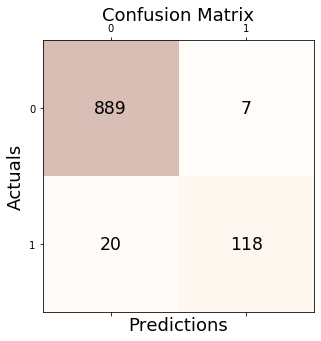

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
#
# Standardize the data set
#
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Fit the SVC model
#
svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train, y_train)
#
# Get the predictions
#
y_pred = svc.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [135]:
df.head()

,Target,Text,num_char,num_words,num_sentences,Ham?Spam,Final_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,ham,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ham,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,ham,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,ham,nah think goe usf live around though


In [136]:
## in the above MULTINOMIAL NAIVE BAYES percession score 1 means there don't have negetive socre 


In [137]:
# tfidf --> MULTINOMIAL NAIVE BAYES


In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [139]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [140]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [141]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    return accuracy,precision,recall,f1

In [142]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408,
 0.9666666666666667,
 0.8405797101449275,
 0.8992248062015503)

In [143]:
train_classifier(knc,X_train,y_train,X_test,y_test)

(0.9052224371373307, 1.0, 0.2898550724637681, 0.44943820224719105)

In [144]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall,current_f1 = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("F1 - ",current_f1)
    
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9666666666666667
Recall -  0.8405797101449275
F1 -  0.8992248062015503
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
Recall -  0.2898550724637681
F1 -  0.44943820224719105
For  NB
Accuracy -  0.9729206963249516
Precision -  1.0
Recall -  0.7971014492753623
F1 -  0.8870967741935484
For  DT
Accuracy -  0.9342359767891683
Precision -  0.85
Recall -  0.6159420289855072
F1 -  0.7142857142857143
For  LR
Accuracy -  0.9574468085106383
Precision -  0.9519230769230769
Recall -  0.717391304347826
F1 -  0.8181818181818182
For  RF
Accuracy -  0.971953578336557
Precision -  0.9739130434782609
Recall -  0.8115942028985508
F1 -  0.8853754940711462
For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
Recall -  0.7898550724637681
F1 -  0.8549019607843137
For  BgC
Accuracy -  0.9545454545454546
Precision -  0.8582677165354331
Recall -  0.7898550724637681
F1 -  0.8226415094339623
For  ETC
Accuracy -  0.97775628626692

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:22:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  xgb
Accuracy -  0.9690522243713733
Precision -  0.9416666666666667
Recall -  0.8188405797101449
F1 -  0.875968992248062


In [145]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores,'F1':f1_scores}).sort_values('Precision',ascending=False)

In [146]:
performance_df

,Algorithm,Accuracy,Precision,Recall,F1
1,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.905222,1.000000,0.289855,0.449438
2,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.972921,1.000000,0.797101,0.887097
8,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.977756,0.983193,0.847826,0.910506
5,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.971954,0.973913,0.811594,0.885375
0,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.974855,0.966667,0.840580,0.899225
4,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.957447,0.951923,0.717391,0.818182
10,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.969052,0.941667,0.818841,0.875969
6,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.964217,0.931624,0.789855,0.854902
9,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.948743,0.929293,0.666667,0.776371
7,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.954545,0.858268,0.789855,0.822642


In [147]:
print(df.keys())

Index(['Target', 'Text', 'num_char', 'num_words', 'num_sentences', 'Ham?Spam',
       'Final_Text'],
      dtype='object')


In [148]:
print(clfs.keys())

dict_keys(['SVC', 'KN', 'NB', 'DT', 'LR', 'RF', 'AdaBoost', 'BgC', 'ETC', 'GBDT', 'xgb'])


In [149]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [150]:
performance_df1

,Algorithm,variable,value
0,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.905222
1,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.972921
2,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.977756
3,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.971954
4,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.974855
5,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.957447
6,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.969052
7,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.964217
8,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.948743
9,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.954545


In [151]:
#sns.catplot(x = 'Algorithm',y='value',hue = 'variable',data=performance_df1, kind='bar',height=5)
#plt.ylim(0.5,1.0)
#plt.xticks(rotation='vertical')
#plt.show()